In [66]:
import pickle
import json
import pandas as pd

In [1]:
import pickle
with open('steam-data.pkl', 'rb') as f:
    apps = pickle.load(f)

In [3]:
import json
data = apps[0].content.decode('utf8')
data = json.loads(data)
print(json.dumps(data, indent='\t'))

{
	"578080": {
		"success": true,
		"data": {
			"type": "game",
			"name": "PUBG: BATTLEGROUNDS",
			"steam_appid": 578080,
			"required_age": 0,
			"is_free": true,
			"detailed_description": "<strong>LAND, LOOT, SURVIVE!</strong><br>Play PUBG: BATTLEGROUNDS for free.<br>Land on strategic locations, loot weapons and supplies, and survive to become the last team standing across various, diverse Battlegrounds.<br>Squad up and join the Battlegrounds for the original Battle Royale experience that only\u00a0PUBG: BATTLEGROUNDS can offer.<br><br>This content download will also provide access to the BATTLEGROUNDS Test Server, which requires a separate download to play.\u00a0<br>Optional in-game purchases available.",
			"about_the_game": "<strong>LAND, LOOT, SURVIVE!</strong><br>Play PUBG: BATTLEGROUNDS for free.<br>Land on strategic locations, loot weapons and supplies, and survive to become the last team standing across various, diverse Battlegrounds.<br>Squad up and join the Battleground

In [98]:
genres = {}
bad = {
    'data': 0,
    'desc': 0,
    'genres': 0,
}

apps_refined = []
for app in apps:
    app_genres = []
    data = json.loads(app.content.decode('utf8'))
    try:
        data = data[list(data.keys())[0]]['data']
    except:
        # print(data)
        bad['data'] += 1
        continue
    
    if 'required_age' not in data:
        # print('age', data['name'])
        age = 0
    else:
        age = data['required_age']
    if 'detailed_description' not in data:
        # print('desc', data['name'])
        bad['desc'] += 1
        continue

    if 'genres' not in data:
        # print('genres', data['name'])
        bad['genres'] += 1
        continue

    desc = data['detailed_description']

    for genre in data['genres']:
        app_genres.append(genre['description'])
        if genre['description'] not in genres:
            genres[genre['description']] = 1
        else:
            genres[genre['description']] += 1

    apps_refined.append({ 'description': desc, 'age': age, 'genres': app_genres })

print(bad)
for genre in genres:
    print(f"{genre:30}\t{genres[genre]}")

{'data': 717, 'desc': 0, 'genres': 114}
Action                        	2187
Adventure                     	1588
Free to Play                  	499
Massively Multiplayer         	306
RPG                           	1165
Strategy                      	1151
Casual                        	1043
Indie                         	2323
Early Access                  	348
Simulation                    	959
Sports                        	211
Animation & Modeling          	12
Design & Illustration         	12
Photo Editing                 	3
Utilities                     	32
Racing                        	129
Экшены                        	1
Инди                          	1
Многопользовательские игры    	1
Стратегии                     	1
Audio Production              	5
Acción                        	2
Aventura                      	2
Multijugador masivo           	1
Rol                           	1
动作                            	3
Video Production              	10
Software Training             	3
We

In [ ]:
# RPG Strategy Casual

In [57]:
ages = {}
for app in apps_refined:
    if app['age'] in ages:
        ages[app['age']] += 1
    else:
        ages[app['age']] = 1

print(ages)

{0: 3693, '17': 368, '18': 39, '16': 24, '13': 39, 'MA 15+': 1, '1': 1, '12': 1, '15': 1, '10': 1, '14': 1}


In [99]:
genres = []
for app in apps_refined:
    for genre in app['genres']:
        if genre not in genres:
            genres.append(genre)

keep_genres = [ 'RPG', 'Strategy', 'Casual' ]
app_genres = []
app_ages = []
app_desc = []
for app in apps_refined:
    one_hot_genres = []
    for g in genres:
        found = False
        for genre in app['genres']:
            if genre == g:
                one_hot_genres.append(True)
                found = True
        if not found:
            one_hot_genres.append(False)
    app_genres.append(one_hot_genres)
    app_ages.append(app['age'])
    app_desc.append(app['description'].encode('unicode_escape').decode('utf-8'))

df_apps = pd.DataFrame(app_genres, columns=genres)
# remove columns not in keep_genres
df_genres = pd.DataFrame(app_genres, columns=genres)
df_apps = df_apps[keep_genres]
df_apps['age'] = app_ages
df_apps['description'] = app_desc
display(df_genres)
display(df_apps)

,Action,Adventure,Free to Play,Massively Multiplayer,RPG,Strategy,Casual,Indie,Early Access,Simulation,...,策略,Nudity,免费开玩,Movie,Documentary,Sexual Content,Ação,Multijogador Massivo,Corrida,Acesso Antecipado
0,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164,True,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4165,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4166,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4167,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,RPG,Strategy,Casual,age,description
0,False,False,False,0,"<strong>LAND, LOOT, SURVIVE!</strong><br>Play ..."
1,False,False,False,0,Counter-Strike: Global Offensive (CS: GO) expa...
2,True,False,False,17,Embark on an odyssey for the Lost Ark in a vas...
3,False,True,False,0,<strong>The most-played game on Steam.</strong...
4,True,False,False,18,<h1>Pacote Cyberpunk 2077 e Phantom Liberty</h...
...,...,...,...,...,...
4164,False,False,False,0,<h1>JOIN THE DISCORD COMMUNITY</h1><p><a href=...
4165,False,False,False,0,"<h2 class=""bb_tag"">An adventure with 100 diffe..."
4166,False,False,True,0,That's Mahjong! is a Solitaire Mahjong game wh...
4167,False,False,False,0,<h1>A MYSTERIOUS TALE - WISHLIST NOW!</h1><p><...


Strategy   Action         -0.252263
Action     Simulation     -0.211227
Strategy   Adventure      -0.150732
Casual     Action         -0.118819
Adventure  Sports         -0.118012
Indie      Free to Play   -0.111645
RPG        Sports         -0.104768
           Casual         -0.099302
           Racing         -0.098932
Action     Sports         -0.086963
dtype: float64


/Users/oniichan/anaconda3/envs/its530_py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/oniichan/anaconda3/envs/its530_py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/oniichan/anaconda3/envs/its530_py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/oniichan/anaconda3/envs/its530_py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/oniichan/anaconda3/envs/its530_py38/lib/python3.8/site-packages/IPython/c

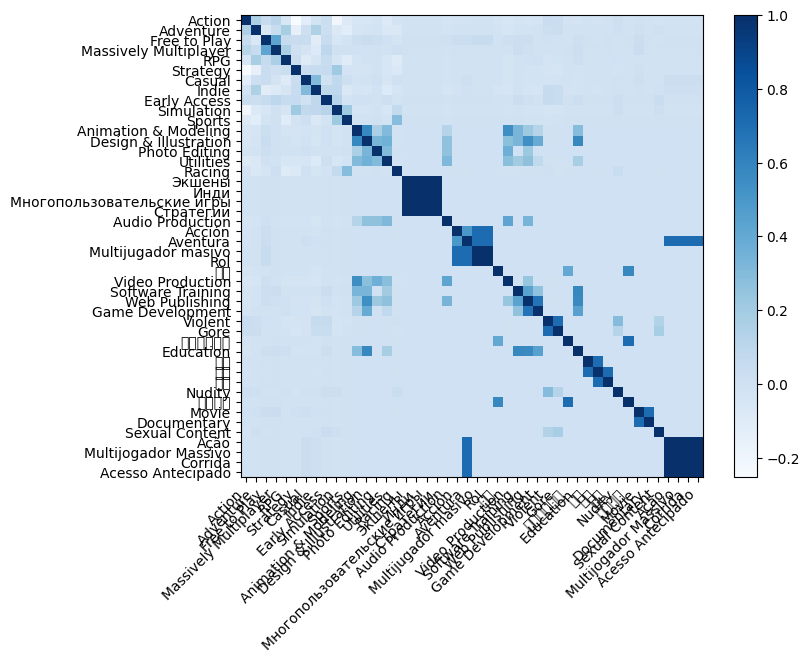

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# dataframe ["target"] = dataset. target  
corr_genres = df_genres.corr()

# Unstack the correlation corr_genres to get pairs of columns and their correlations
unstacked_corr = corr_genres.unstack()
# Sort the correlations in ascending order
sorted_corr = unstacked_corr.sort_values()
# Print the lowest correlations
# we do a step of 2 so we do not double print
"""
Slice of Life  Action          -0.192481
Action         Slice of Life   -0.192481
"""
print(sorted_corr[:20:2])

# remove the diag
# np.fill_diagonal(corr_genres.values, np.nan)

plt.figure(figsize=(8, 6))  # Adjust width and height as needed

#plotting correlation corr_genres 
plt.imshow(corr_genres, cmap='Blues')

#adding colorbar 
plt.colorbar()

# Adding labels to the corr_genres
plt.xticks(range(len(corr_genres)), genres, rotation=45, ha='right')
plt.yticks(range(len(corr_genres)), genres)

# Display the plot
plt.show()

### Convert to CSV

In [101]:
# convert data to csv
df_apps.to_csv('steam.csv', index=False)